In [1]:
import pandas as pd

df = pd.read_csv("../data/heart_disease_proc.csv")

In [2]:
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,target
0,0.936181,0.750380,-0.276443,0.017494,1.068965,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [5]:
X=df.drop("target",axis=1)
y=df["target"]

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X,y)
f_importance = rf.feature_importances_

In [7]:
f_importance

array([0.07656757, 0.06439441, 0.06059236, 0.09852304, 0.07839015,
       0.02058137, 0.01670052, 0.01039806, 0.00866056, 0.02120892,
       0.0754355 , 0.00763765, 0.00858639, 0.01639035, 0.00020966,
       0.01282731, 0.02812007, 0.0406025 , 0.02640748, 0.0253808 ,
       0.00775612, 0.10397045, 0.01551813, 0.01148653, 0.00882016,
       0.08542607, 0.00497345, 0.0644344 ])

In [8]:
features= df.drop("target",axis=1).columns

In [9]:
for f,i in zip(features,f_importance):
    print(f,"=>",i)

age => 0.07656756799585371
trestbps => 0.06439441216709903
chol => 0.06059236300647394
thalach => 0.09852304070215474
oldpeak => 0.0783901545022765
sex_0 => 0.02058137256482713
sex_1 => 0.016700520234135544
cp_1 => 0.010398058027970381
cp_2 => 0.008660562667765232
cp_3 => 0.02120892417504846
cp_4 => 0.07543549666837365
fbs_0 => 0.0076376484940556015
fbs_1 => 0.008586393892428242
restecg_0 => 0.01639035329874917
restecg_1 => 0.00020966363371113604
restecg_2 => 0.01282730587355378
exang_0 => 0.028120068485385775
exang_1 => 0.040602504075081154
slope_1 => 0.026407481156766544
slope_2 => 0.025380800571715757
slope_3 => 0.007756124829656284
ca_0.0 => 0.10397044858214627
ca_1.0 => 0.015518127061006318
ca_2.0 => 0.011486525930285702
ca_3.0 => 0.008820159460384124
thal_3.0 => 0.08542606638285476
thal_6.0 => 0.004973451487555978
thal_7.0 => 0.06443440407268503


In [10]:
feat_imp = pd.DataFrame({"Features":features,"Importances":f_importance})
feat_imp=feat_imp.sort_values(by="Importances",ascending=False)
feat_imp

,Features,Importances
21,ca_0.0,0.103970
3,thalach,0.098523
25,thal_3.0,0.085426
4,oldpeak,0.078390
0,age,0.076568
10,cp_4,0.075435
27,thal_7.0,0.064434
1,trestbps,0.064394
2,chol,0.060592
17,exang_1,0.040603


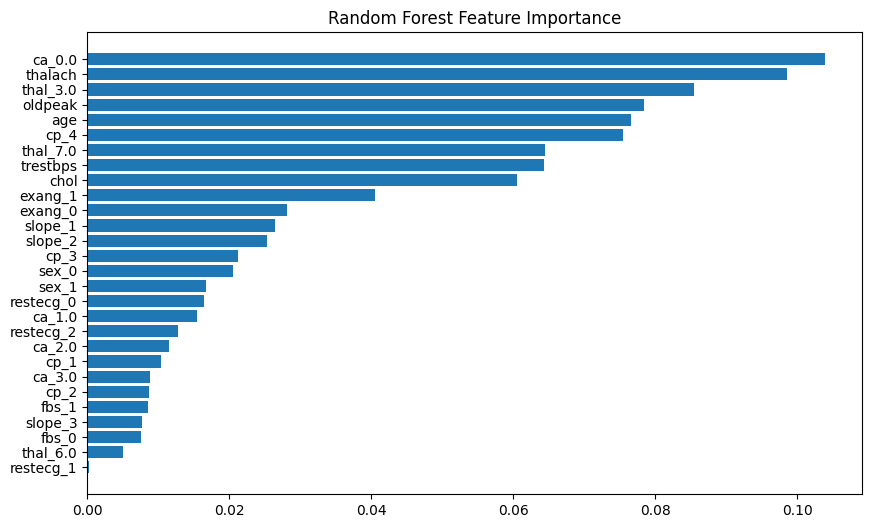

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feat_imp["Features"], feat_imp["Importances"])
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.show()

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000)
rfe = RFE(model,n_features_to_select=8)
rfe.fit(X,y)

selected_feat = pd.Series(rfe.support_,index=features)
selected_feat

age          False
trestbps     False
chol         False
thalach      False
oldpeak       True
sex_0         True
sex_1        False
cp_1         False
cp_2         False
cp_3          True
cp_4          True
fbs_0        False
fbs_1        False
restecg_0    False
restecg_1    False
restecg_2    False
exang_0      False
exang_1       True
slope_1      False
slope_2       True
slope_3      False
ca_0.0        True
ca_1.0       False
ca_2.0       False
ca_3.0       False
thal_3.0     False
thal_6.0     False
thal_7.0      True
dtype: bool

In [13]:
print("Selected Features by RFE:")
print(selected_feat[selected_feat].index.tolist())

Selected Features by RFE:
['oldpeak', 'sex_0', 'cp_3', 'cp_4', 'exang_1', 'slope_2', 'ca_0.0', 'thal_7.0']


In [14]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import MinMaxScaler

min_max_X = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2,k=8)
chi_selector.fit(min_max_X,y)

SelectKBest(k=8, score_func=<function chi2 at 0x00000150C8555760>)

In [15]:
chi_features = X.columns[chi_selector.get_support()]
print("Selected Features by Chi-Square:")
print(chi_features.tolist())

Selected Features by Chi-Square:
['cp_3', 'cp_4', 'exang_1', 'slope_1', 'slope_2', 'ca_0.0', 'thal_3.0', 'thal_7.0']


In [16]:
top_features = feat_imp.head(8)["Features"].tolist()

X_selected = df[top_features]
y = df["target"]

print("Final Selected Features:", top_features)

Final Selected Features: ['ca_0.0', 'thalach', 'thal_3.0', 'oldpeak', 'age', 'cp_4', 'thal_7.0', 'trestbps']


In [17]:
df_new = pd.concat([X_selected, y], axis=1)

In [18]:
df_new

,ca_0.0,thalach,thal_3.0,oldpeak,age,cp_4,thal_7.0,trestbps,target
0,1.0,0.017494,0.0,1.068965,0.936181,0.0,0.0,0.750380,0
1,0.0,-1.816334,1.0,0.381773,1.378929,1.0,0.0,1.596266,1
2,0.0,-0.899420,0.0,1.326662,1.378929,1.0,1.0,-0.659431,1
3,1.0,1.633010,1.0,2.099753,-1.941680,0.0,0.0,-0.095506,0
4,1.0,0.978071,1.0,0.295874,-1.498933,0.0,0.0,-0.095506,0
...,...,...,...,...,...,...,...,...,...
292,1.0,-1.161395,0.0,-0.734914,0.272059,1.0,1.0,0.468418,1
293,1.0,-0.768432,0.0,0.124076,-1.056185,0.0,1.0,-1.223355,1
294,0.0,-0.375469,0.0,2.013854,1.489615,1.0,1.0,0.693988,1
295,0.0,-1.510696,0.0,0.124076,0.272059,1.0,1.0,-0.095506,1


In [19]:
df_new.to_csv("../data/Heart_Disease_Selected_Features.csv",index=False)